# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
data=pd.read_csv('auto_insurance_payment.csv')
data

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194
...,...,...
58,9,874
59,31,2098
60,14,955
61,53,2446


In [6]:
data.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [4]:
data.tail()

,Number of claims,Total Payment
58,9,874
59,31,2098
60,14,955
61,53,2446
62,26,1875


In [7]:
data.isna().sum()

Number of claims    0
 Total Payment      0
dtype: int64

In [7]:
data.hist

<bound method hist_frame of     Number of claims   Total Payment
0                108            3925
1                 19             462
2                 13             157
3                124            4222
4                 40            1194
..               ...             ...
58                 9             874
59                31            2098
60                14             955
61                53            2446
62                26            1875

[63 rows x 2 columns]>

array([[<Axes: title={'center': 'Number of claims'}>,
        <Axes: title={'center': ' Total Payment'}>]], dtype=object)

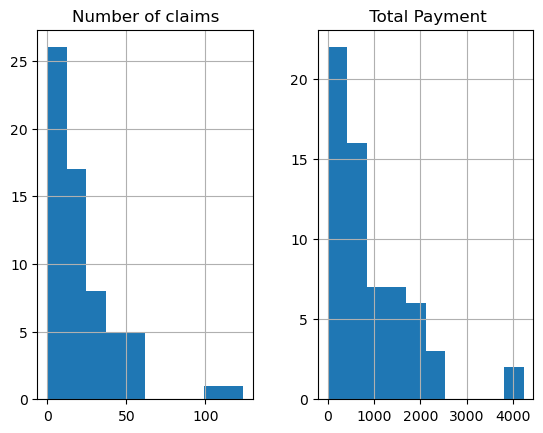

In [6]:
data.hist()

In [5]:
data.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


# Assign X-Input features And Y- Response feature

In [8]:
data.head(1)

,Number of claims,Total Payment
0,108,3925


In [10]:
x=data.iloc[:,:-1]# All rows & all column except last column
x.head(2)

,Number of claims
0,108
1,19


In [11]:
y=data.iloc[:,-1:] # All rows and last column
y.head(2)

,Total Payment
0,3925
1,462


In [12]:
type(x)
type(y)

pandas.core.frame.DataFrame

In [13]:
a=data.iloc[:,:-1].values
b=data.iloc[:,-1].values
print(type(a),type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
a

array([[108],
       [ 19],
       [ 13],
       [124],
       [ 40],
       [ 57],
       [ 23],
       [ 14],
       [ 45],
       [ 10],
       [  5],
       [ 48],
       [ 11],
       [ 23],
       [  7],
       [  2],
       [ 24],
       [  6],
       [  3],
       [ 23],
       [  6],
       [  9],
       [  9],
       [  3],
       [ 29],
       [  7],
       [  4],
       [ 20],
       [  7],
       [  4],
       [  0],
       [ 25],
       [  6],
       [  5],
       [ 22],
       [ 11],
       [ 61],
       [ 12],
       [  4],
       [ 16],
       [ 13],
       [ 60],
       [ 41],
       [ 37],
       [ 55],
       [ 41],
       [ 11],
       [ 27],
       [  8],
       [  3],
       [ 17],
       [ 13],
       [ 13],
       [ 15],
       [  8],
       [ 29],
       [ 30],
       [ 24],
       [  9],
       [ 31],
       [ 14],
       [ 53],
       [ 26]], dtype=int64)

In [19]:
b

array([3925,  462,  157, 4222, 1194, 1709,  569,  775,  214,  653,  209,
       2481,  235,  396,  488,   66, 1349,  509,   44,  113,  148,  487,
        521,  132, 1039,  775,  118,  981,  279,  381,    0,  692,  146,
        403, 1615,  572, 2176,  581,  126,  596,  899, 2024, 1813, 1528,
       1628,  734,  213,  926,  761,  399, 1421,   93,  319,  321,  556,
       1333, 1945, 1379,  874, 2098,  955, 2446, 1875], dtype=int64)

In [20]:
data.corr()

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


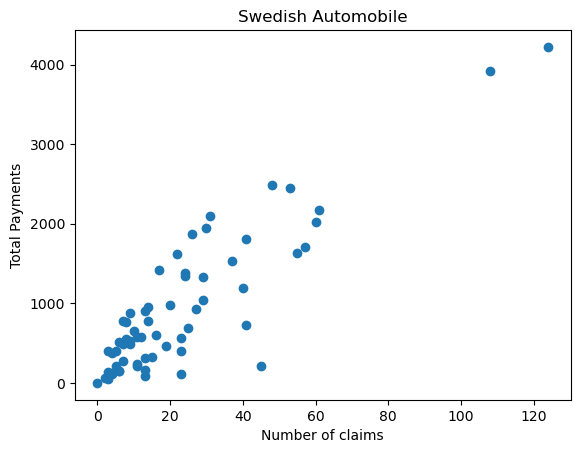

In [21]:
#visualize dataset
plt.scatter(x,y)
plt.title('Swedish Automobile')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments')
plt.show()

# split the data for training and testing


In [22]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=2)


In [23]:
data.shape

(63, 2)

In [24]:
xtrain.shape

(50, 1)

In [25]:
xtest.shape

(13, 1)

In [26]:
xtest

,Number of claims
36,61
0,108
51,13
58,9
23,3
48,8
35,11
28,7
52,13
32,6


# Build the model with Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#train data
print('Training Started.....\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training Completed......')
print()
#test data
print('Testing Invocked.....\n')
ypred=lin_reg.predict(xtest)
print('Predicted Total Payments\n',ypred)
print('Testing ais also completed....\n')

Training Started.....



Training Completed......

Testing Invocked.....

Predicted Total Payments
 [[2155.63554596]
 [3666.38356777]
 [ 612.74394921]
 [ 484.16964948]
 [ 291.30819988]
 [ 452.02607454]
 [ 548.45679934]
 [ 419.88249961]
 [ 612.74394921]
 [ 387.73892468]
 [ 805.6053988 ]
 [ 194.87747509]
 [ 644.88752414]]
Testing ais also completed....



In [28]:
ytest

,Total Payment
36,2176
0,3925
51,93
58,874
23,132
48,761
35,572
28,279
52,319
32,146


In [29]:
diff=ytest-ypred
diff

,Total Payment
36,20.364454
0,258.616432
51,-519.743949
58,389.830351
23,-159.308200
48,308.973925
35,23.543201
28,-140.882500
52,-293.743949
32,-241.738925


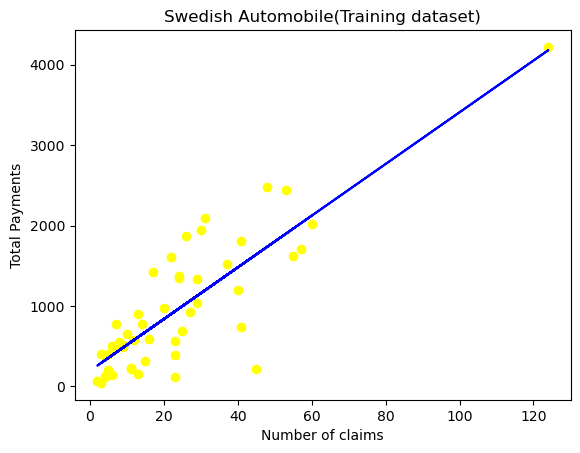

In [31]:
# visualize the training dataset
plt.scatter(xtrain,ytrain,color='yellow')
plt.plot(xtrain,lin_reg.predict(xtrain),color='blue')
plt.title('Swedish Automobile(Training dataset)')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments')
plt.show()

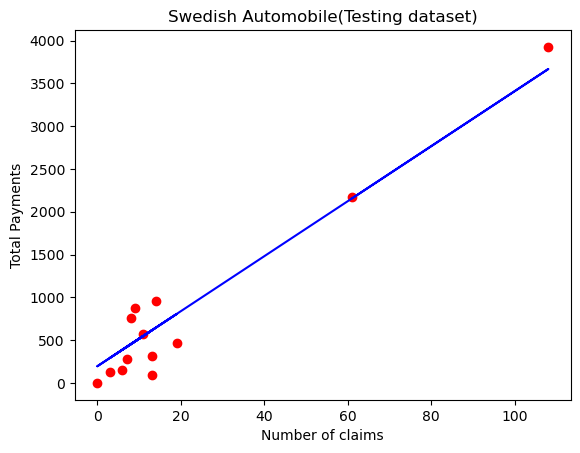

In [32]:
# visualize the test dataset
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,lin_reg.predict(xtest),color='blue')
plt.title('Swedish Automobile(Testing dataset)')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments')
plt.show()

# Model Performance via Metrics

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t', mean_squared_error(ytest,ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('Variance Score: \t', explained_variance_score(ytest,ypred))

#coefficient od determination - R_square

print()
print('R-Square:\t',r2_score(ytest,ypred))

Mean Squared Error: 	 79044.58911940284

RMSE: 	 281.1486957455126

Variance Score: 	 0.930288922295053

R-Square:	 0.9284723758722918


# How to predict for unseen data

In [34]:
# Doubt
unseen_pred=lin_reg.predict(np.array([[int(input('Enter the # of claims: '))]]))
print('The Predicted Total Payments: \t', unseen_pred)

Enter the # of claims: 183
The Predicted Total Payments: 	 [[6077.1516877]]


C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Parameter

In [35]:
print('Coefficient/Slope :\t',lin_reg.coef_)
print()
print('Intercept/Constant:\t', lin_reg.intercept_)


Coefficient/Slope :	 [[32.14357493]]

Intercept/Constant:	 [194.87747509]


# Saving the trained Model:(Deployable object)
  1. Pickle file conversion
  2. Joblib file conversion

# Pickle Method:

In [36]:
import pickle

with open('model_pkl','wb') as file:
    pickle.dump(lin_reg,file)
    

In [37]:
with open('model_pkl','rb') as f:
    deploy_lr=pickle.load(f)

In [38]:
deploy_lr.predict([[34]])

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1287.75902278]])

# Joblib

In [41]:
import joblib

joblib.dump(lin_reg,'model_jlib')



['model_jlib']

In [42]:
j_deploy_lr=joblib.load('model_jlib')

In [43]:
j_deploy_lr.predict([[34285]])

C:\Users\shabaz\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1102237.34402869]])